In [1]:
# Importing all the required Libraries
import os
import pandas as pd
import numpy as np
import csv

# Data Visualization libraries
from pandas.plotting import scatter_matrix
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
import seaborn as sns

# Machine learning models libraries
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
import xgboost as xgb
from sklearn.ensemble import BaggingClassifier
from catboost import CatBoostClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import VotingClassifier

# Evaluation Metrics
from sklearn.metrics import (
    accuracy_score, 
    precision_score, 
    recall_score, 
    f1_score, 
    confusion_matrix, 
    roc_curve, 
    auc, 
    roc_auc_score, 
    precision_recall_curve, 
    average_precision_score, 
    matthews_corrcoef
)

# Deep learning models libraries
import tensorflow as tf
from sklearn.neural_network import MLPClassifier
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import LSTM, GRU, Dropout, Dense, Input, Flatten, Conv2D, MaxPooling2D, SimpleRNN
from tensorflow.keras.optimizers import Adam

In [2]:
# Loading the train and test datasets with labels
train_data = pd.read_csv("proData/train_data.csv")
test_data = pd.read_csv("proData/test_data.csv")
train_labels = pd.read_csv("proData/train_labels.csv")
test_labels = pd.read_csv("proData/test_labels.csv")

In [3]:
# Selecting the best features from the saved datasets
Features = ["htn", "dm", "bgr", "bu", "pc", "appet", "sod", "sg", "pcv", "hemo"]

### Ensemble Learning models

In [4]:
# Fit logistic regression model
model_lr = LogisticRegression(solver='lbfgs', max_iter=1000)
model_lr.fit(train_data, train_labels)

C:\Users\chand\Py_Env\ckd\lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(max_iter=1000)

In [5]:
# Fit Gaussian Naive Bayes model
model_nb = GaussianNB()
model_nb.fit(train_data, train_labels)

C:\Users\chand\Py_Env\ckd\lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB()

In [6]:
# Fit Decision Tree model
model_dt = DecisionTreeClassifier(random_state=42)
model_dt.fit(train_data, train_labels)

DecisionTreeClassifier(random_state=42)

In [7]:
# Fit Support Vector Machine Classifier (SVM) model
model_svm = SVC(kernel='linear', C=1, random_state=42, probability=True)
model_svm.fit(train_data, train_labels)

C:\Users\chand\Py_Env\ckd\lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=1, kernel='linear', probability=True, random_state=42)

In [8]:
# Fit K-Nearest Neighbors model
model_knn = KNeighborsClassifier(n_neighbors=10)
model_knn.fit(train_data, train_labels)

C:\Users\chand\Py_Env\ckd\lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=10)

In [9]:
em_names = ['rf', 'bagging', 'xgb', 'ada', 'cb', 'gb', 'stacking', "vh", "vs", "blend"]
lem_names = ['RF', 'Bagging','XGBoost', 'Adaboost', 'Catboost', 'GradientBoost', 'Stacking', "Voting Hard", "Voting Soft", "Blending"]

cem_names = ['darkgreen', 'maroon', 'mediumblue', 'goldenrod', 'fuchsia', 'saddlebrown', 'teal', "cyan", "red", "yellow"]

# Create a list of the models to be ensembled
em_models = [('lr', model_lr), ('nb', model_nb), ('dt', model_dt), ('svm', model_svm), ('knn', model_knn)]

In [10]:
# Fit Random forest model
model_rf = RandomForestClassifier(n_estimators=100, max_depth=3, random_state=42)
model_rf.fit(train_data[Features], train_labels)

C:\Users\chand\Py_Env\ckd\lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestClassifier(max_depth=3, random_state=42)

In [11]:
# Aggregate the predictions made by each BaggingClassifier
y_preds = []
for name, model in em_models:
    # Create a BaggingClassifier object for the current model
    bagging_model = BaggingClassifier(model, n_estimators=10, max_samples=0.8, random_state=42)
    
    # Train the BaggingClassifier on the training set
    bagging_model.fit(train_data[Features], train_labels)

    # Make predictions on the testing set
    y_pred = bagging_model.predict_proba(test_data[Features])[:, 1]
    
    # Append the predicted probabilities to the list of predictions
    y_preds.append(y_pred)

# Aggregate the predictions using weighted voting
weights = [0.2, 0.2, 0.2, 0.2, 0.2]
model_bagging = np.average(y_preds, axis=0, weights=weights)

C:\Users\chand\Py_Env\ckd\lib\site-packages\sklearn\ensemble\_bagging.py:888: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\chand\Py_Env\ckd\lib\site-packages\sklearn\ensemble\_bagging.py:888: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\chand\Py_Env\ckd\lib\site-packages\sklearn\ensemble\_bagging.py:888: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\chand\Py_Env\ckd\lib\site-packages\sklearn\ensemble\_bagging.py:888: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samp

In [12]:
# Fit XGboost model
model_xgb = xgb.XGBClassifier()
model_xgb.fit(train_data[Features], train_labels)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [13]:
# Create an AdaBoost classifier with 50 estimators
model_ada = AdaBoostClassifier(n_estimators=50, random_state=42)

# Fit the AdaBoost classifier to the training data
model_ada.fit(train_data[Features], train_labels)

C:\Users\chand\Py_Env\ckd\lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\chand\Py_Env\ckd\lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoostClassifier(random_state=42)

In [14]:
# Create an instance of the CatBoostClassifier
model_cb = CatBoostClassifier(iterations=100, learning_rate=0.1, depth=6)

# Fit the model on the training data
model_cb.fit(train_data[Features], train_labels)

0:	learn: 0.6279733	total: 134ms	remaining: 13.3s
1:	learn: 0.5742195	total: 135ms	remaining: 6.63s
2:	learn: 0.5313693	total: 136ms	remaining: 4.41s
3:	learn: 0.4875901	total: 137ms	remaining: 3.29s
4:	learn: 0.4501468	total: 138ms	remaining: 2.63s
5:	learn: 0.4161134	total: 139ms	remaining: 2.18s
6:	learn: 0.3882712	total: 140ms	remaining: 1.86s
7:	learn: 0.3616224	total: 142ms	remaining: 1.63s
8:	learn: 0.3400082	total: 144ms	remaining: 1.45s
9:	learn: 0.3193674	total: 145ms	remaining: 1.3s
10:	learn: 0.2983482	total: 146ms	remaining: 1.18s
11:	learn: 0.2800458	total: 147ms	remaining: 1.08s
12:	learn: 0.2617179	total: 148ms	remaining: 991ms
13:	learn: 0.2452212	total: 149ms	remaining: 915ms
14:	learn: 0.2309280	total: 150ms	remaining: 850ms
15:	learn: 0.2202831	total: 151ms	remaining: 792ms
16:	learn: 0.2088923	total: 152ms	remaining: 741ms
17:	learn: 0.2006202	total: 153ms	remaining: 696ms
18:	learn: 0.1913302	total: 154ms	remaining: 655ms
19:	learn: 0.1820799	total: 155ms	remainin

In [15]:
# Create a Gradient Boosting Classifier object
model_gb = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

# Train the Gradient Boosting Classifier on the training set
model_gb.fit(train_data[Features], train_labels)

C:\Users\chand\Py_Env\ckd\lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GradientBoostingClassifier(random_state=42)

In [16]:
# Creating a Stacking Classifier object
model_stacking = StackingClassifier(estimators=em_models, final_estimator=LogisticRegression())

# Fit the stacking model on the training data
model_stacking.fit(train_data[Features], train_labels)

C:\Users\chand\Py_Env\ckd\lib\site-packages\sklearn\preprocessing\_label.py:97: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\chand\Py_Env\ckd\lib\site-packages\sklearn\preprocessing\_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


StackingClassifier(estimators=[('lr', LogisticRegression(max_iter=1000)),
                               ('nb', GaussianNB()),
                               ('dt', DecisionTreeClassifier(random_state=42)),
                               ('svm',
                                SVC(C=1, kernel='linear', probability=True,
                                    random_state=42)),
                               ('knn', KNeighborsClassifier(n_neighbors=10))],
                   final_estimator=LogisticRegression())

In [17]:
# Define the voting classifier with hard voting
model_vh = VotingClassifier(estimators=em_models, voting='hard')

# Fit the models on the training data
model_vh.fit(train_data[Features], train_labels)

C:\Users\chand\Py_Env\ckd\lib\site-packages\sklearn\preprocessing\_label.py:97: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\chand\Py_Env\ckd\lib\site-packages\sklearn\preprocessing\_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


VotingClassifier(estimators=[('lr', LogisticRegression(max_iter=1000)),
                             ('nb', GaussianNB()),
                             ('dt', DecisionTreeClassifier(random_state=42)),
                             ('svm',
                              SVC(C=1, kernel='linear', probability=True,
                                  random_state=42)),
                             ('knn', KNeighborsClassifier(n_neighbors=10))])

In [18]:
# Define the voting classifier with soft voting
model_vs = VotingClassifier(estimators=em_models, voting='soft')

# Fit the models on the training data
model_vs.fit(train_data[Features], train_labels)

C:\Users\chand\Py_Env\ckd\lib\site-packages\sklearn\preprocessing\_label.py:97: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\chand\Py_Env\ckd\lib\site-packages\sklearn\preprocessing\_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


VotingClassifier(estimators=[('lr', LogisticRegression(max_iter=1000)),
                             ('nb', GaussianNB()),
                             ('dt', DecisionTreeClassifier(random_state=42)),
                             ('svm',
                              SVC(C=1, kernel='linear', probability=True,
                                  random_state=42)),
                             ('knn', KNeighborsClassifier(n_neighbors=10))],
                 voting='soft')

In [19]:
# Splitting the train data into train and val set
train_set, val_set, train_set_labels, val_set_labels = train_test_split(train_data, train_labels, test_size=0.2, random_state=0)

In [20]:
base_predictions = []
meta_predictions = []

for name, model in em_models:
    model.fit(train_set[Features], train_set_labels)
    base_prediction = model.predict(val_set[Features])
    meta_prediction = model.predict(test_data[Features])
    
    base_prediction = base_prediction.reshape(len(base_prediction), 1)
    meta_prediction = meta_prediction.reshape(len(meta_prediction), 1)
    
    base_predictions.append(base_prediction)
    meta_predictions.append(meta_prediction)

base_predictions = np.hstack(base_predictions)
meta_predictions = np.hstack(meta_predictions)

model_blend = LogisticRegression()
model_blend.fit(base_predictions, val_set_labels)

C:\Users\chand\Py_Env\ckd\lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\chand\Py_Env\ckd\lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\chand\Py_Env\ckd\lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\chand\Py_Env\ckd\lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to

LogisticRegression()

### Deep Learning Models

In [21]:
dl_names = ["ann", "mlp", "rnn", "lstm", "gru"]
ldl_names = ["ANN", "MLP", "SimpleRNN", "LSTM", "GRU"]

cdl_names = ["lime", "darkblue", "red", "chocolate", "darkorange"]

In [22]:
# Reshape the features to 2D tensor shape (batch_size, num_features)
train_features = train_data[Features].values
test_features = test_data[Features].values

In [23]:
# Define the model architecture
model_ann = Sequential()
model_ann.add(Dense(15, input_dim=train_features.shape[1], activation='relu'))
model_ann.add(Dropout(0.2))
model_ann.add(Dense(15, activation='relu'))
model_ann.add(Dropout(0.4))
model_ann.add(Dense(1, activation='sigmoid'))

# Compile the model
optimizer = Adam(learning_rate=0.001)
model_ann.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model_ann.fit(train_features, train_labels, validation_data=(test_features, test_labels), epochs=100, batch_size=20, verbose=1)

C:\Users\chand\Py_Env\ckd\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.7956 - loss: 0.5443 - val_accuracy: 0.9375 - val_loss: 0.4318
Epoch 2/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8500 - loss: 0.4601 - val_accuracy: 0.9375 - val_loss: 0.3602
Epoch 3/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8976 - loss: 0.3973 - val_accuracy: 0.9375 - val_loss: 0.2976
Epoch 4/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9308 - loss: 0.3305 - val_accuracy: 0.9375 - val_loss: 0.2449
Epoch 5/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9149 - loss: 0.3184 - val_accuracy: 0.9375 - val_loss: 0.2013
Epoch 6/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9461 - loss: 0.2485 - val_accuracy: 0.9500 - val_loss: 0.1679
Epoch 7/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9518 - loss: 0.2136 - val_accuracy: 0.9500 - val_loss: 0.1416
Epoch 8/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9668 - loss: 0.2085 - val_accuracy: 0.9500 - 

In [24]:
# Create an MLP classifier with two hidden layers of 50 neurons each
model_mlp = MLPClassifier(hidden_layer_sizes=(50, 50), max_iter=1000, random_state=42)

# Train the MLP classifier on the training set
model_mlp.fit(train_data[Features], train_labels)

C:\Users\chand\Py_Env\ckd\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1105: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MLPClassifier(hidden_layer_sizes=(50, 50), max_iter=1000, random_state=42)

In [25]:
# Reshape the features to 3D tensor shape (batch_size, time_steps, num_features)
train_features = train_features.reshape(-1, 1, train_features.shape[1])
test_features = test_features.reshape(-1, 1, test_features.shape[1])

In [26]:
# Define the model architecture
model_rnn = Sequential()
model_rnn.add(SimpleRNN(64, input_shape=(train_features.shape[1], train_features.shape[2]), return_sequences=True))
model_rnn.add(Dropout(0.2))
model_rnn.add(SimpleRNN(32))
model_rnn.add(Dropout(0.2))
model_rnn.add(Dense(1, activation='sigmoid'))

# Compile the model
optimizer = Adam(learning_rate=0.001)
model_rnn.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model_rnn.fit(train_features, train_labels, validation_data=(test_features, test_labels), epochs=100, batch_size=20)

Epoch 1/100


C:\Users\chand\Py_Env\ckd\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - accuracy: 0.8957 - loss: 0.3580 - val_accuracy: 0.9500 - val_loss: 0.1651
Epoch 2/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9439 - loss: 0.1543 - val_accuracy: 0.9750 - val_loss: 0.0908
Epoch 3/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9625 - loss: 0.1011 - val_accuracy: 0.9875 - val_loss: 0.0640
Epoch 4/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9784 - loss: 0.0706 - val_accuracy: 1.0000 - val_loss: 0.0519
Epoch 5/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9770 - loss: 0.0767 - val_accuracy: 1.0000 - val_loss: 0.0424
Epoch 6/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9900 - loss: 0.0399 - val_accuracy: 1.0000 - val_loss: 0.0390
Epoch 7/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9842 - loss: 0.0501 - val_accuracy: 0.9875 - val_loss: 0.0364
Epoch 8/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9775 - loss: 0.0581 - val_accuracy: 0.9875 - val_loss: 0.

In [27]:
# Define the model architecture
model_lstm = Sequential()
model_lstm.add(LSTM(64, input_shape=(train_features.shape[1], train_features.shape[2]), return_sequences=True))
model_lstm.add(Dropout(0.2))
model_lstm.add(LSTM(32))
model_lstm.add(Dropout(0.2))
model_lstm.add(Dense(1, activation='sigmoid'))

# Compile the model
optimizer = Adam(learning_rate=0.001)
model_lstm.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model_lstm.fit(train_features, train_labels, validation_data=(test_features, test_labels), epochs=100, batch_size=20)

Epoch 1/100


C:\Users\chand\Py_Env\ckd\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - accuracy: 0.8374 - loss: 0.6804 - val_accuracy: 0.9000 - val_loss: 0.6388
Epoch 2/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9372 - loss: 0.6216 - val_accuracy: 0.9125 - val_loss: 0.5328
Epoch 3/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9311 - loss: 0.5146 - val_accuracy: 0.9125 - val_loss: 0.3750
Epoch 4/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9362 - loss: 0.3586 - val_accuracy: 0.9500 - val_loss: 0.2335
Epoch 5/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9438 - loss: 0.2189 - val_accuracy: 0.9500 - val_loss: 0.1476
Epoch 6/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9500 - loss: 0.1518 - val_accuracy: 0.9625 - val_loss: 0.0996
Epoch 7/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9827 - loss: 0.0929 - val_accuracy: 0.9625 - val_loss: 0.0741
Epoch 8/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9698 - loss: 0.0803 - val_accuracy: 0.9625 - val_loss: 0.

In [28]:
# Define the model architecture
model_gru = Sequential()
model_gru.add(GRU(64, input_shape=(train_features.shape[1], train_features.shape[2]), return_sequences=True))
model_gru.add(Dropout(0.2))
model_gru.add(GRU(32))
model_gru.add(Dropout(0.2))
model_gru.add(Dense(1, activation='sigmoid'))

# Compile the model
optimizer = Adam(learning_rate=0.001)
model_gru.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model_gru.fit(train_features, train_labels, validation_data=(test_features, test_labels), epochs=100, batch_size=20)

Epoch 1/100


C:\Users\chand\Py_Env\ckd\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


20/20 ━━━━━━━━━━━━━━━━━━━━ 4s 24ms/step - accuracy: 0.8465 - loss: 0.6366 - val_accuracy: 0.9000 - val_loss: 0.4975
Epoch 2/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9470 - loss: 0.4604 - val_accuracy: 0.9125 - val_loss: 0.3152
Epoch 3/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9654 - loss: 0.2719 - val_accuracy: 0.9375 - val_loss: 0.1868
Epoch 4/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9618 - loss: 0.1667 - val_accuracy: 0.9625 - val_loss: 0.1179
Epoch 5/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9866 - loss: 0.1109 - val_accuracy: 0.9625 - val_loss: 0.0825
Epoch 6/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9907 - loss: 0.0717 - val_accuracy: 0.9625 - val_loss: 0.0607
Epoch 7/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9865 - loss: 0.0611 - val_accuracy: 0.9625 - val_loss: 0.0504
Epoch 8/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9816 - loss: 0.0541 - val_accuracy: 1.0000 - val_loss: 0.

### Model Evaluation

In [29]:
model_names = em_names + dl_names
legend_names = lem_names + ldl_names
colors_names = cem_names + cdl_names

In [30]:
output_dir = 'models'
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

Confusion matrix of the model RF:
[[29  0]
 [ 1 50]]
True Negative of the model RF -> 29
False Positive of the model RF -> 0
False Negative of the model RF -> 1
True Positive of the model RF -> 50
Accuracy of the model RF -> 0.9875
Misclassification rate of the model RF -> 0.012499999999999956
Precision of the model RF -> 1.0
Recall of the model RF -> 0.9803921568627451
F1 Measure of the model RF -> 0.9900990099009901
Specificity of the model RF -> 1.0
MCC of the model RF -> 0.973505222533836
AUC of the model RF -> 1.0
Precision-Recall AUC of the model RF -> 1.0




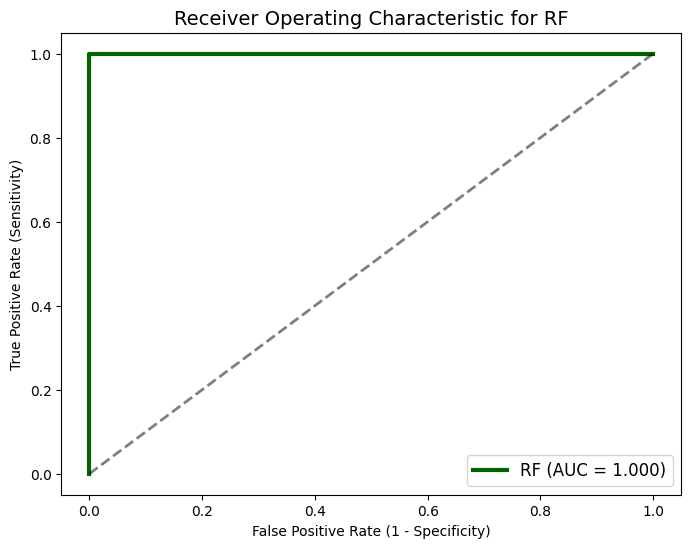

Confusion matrix of the model Bagging:
[[29  0]
 [ 1 50]]
True Negative of the model Bagging -> 29
False Positive of the model Bagging -> 0
False Negative of the model Bagging -> 1
True Positive of the model Bagging -> 50
Accuracy of the model Bagging -> 0.9875
Misclassification rate of the model Bagging -> 0.012499999999999956
Precision of the model Bagging -> 1.0
Recall of the model Bagging -> 0.9803921568627451
F1 Measure of the model Bagging -> 0.9900990099009901
Specificity of the model Bagging -> 1.0
MCC of the model Bagging -> 0.973505222533836
AUC of the model Bagging -> 0.9901960784313726
Precision-Recall AUC of the model Bagging -> 0.9928921568627451




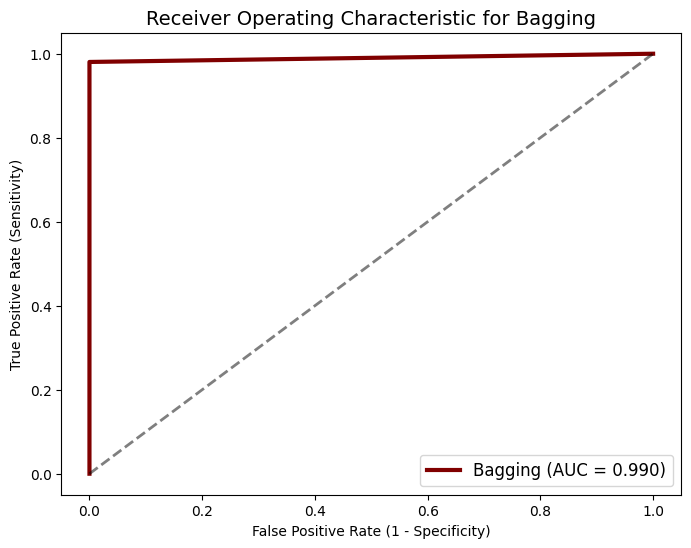

Confusion matrix of the model XGBoost:
[[29  0]
 [ 1 50]]
True Negative of the model XGBoost -> 29
False Positive of the model XGBoost -> 0
False Negative of the model XGBoost -> 1
True Positive of the model XGBoost -> 50
Accuracy of the model XGBoost -> 0.9875
Misclassification rate of the model XGBoost -> 0.012499999999999956
Precision of the model XGBoost -> 1.0
Recall of the model XGBoost -> 0.9803921568627451
F1 Measure of the model XGBoost -> 0.9900990099009901
Specificity of the model XGBoost -> 1.0
MCC of the model XGBoost -> 0.973505222533836
AUC of the model XGBoost -> 1.0
Precision-Recall AUC of the model XGBoost -> 1.0




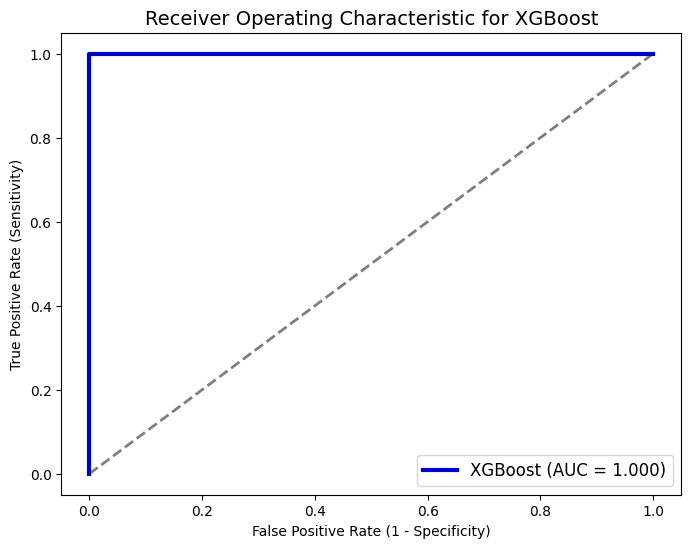

Confusion matrix of the model Adaboost:
[[29  0]
 [ 3 48]]
True Negative of the model Adaboost -> 29
False Positive of the model Adaboost -> 0
False Negative of the model Adaboost -> 3
True Positive of the model Adaboost -> 48
Accuracy of the model Adaboost -> 0.9625
Misclassification rate of the model Adaboost -> 0.03749999999999998
Precision of the model Adaboost -> 1.0
Recall of the model Adaboost -> 0.9411764705882353
F1 Measure of the model Adaboost -> 0.9696969696969697
Specificity of the model Adaboost -> 1.0
MCC of the model Adaboost -> 0.9235481451827989
AUC of the model Adaboost -> 1.0
Precision-Recall AUC of the model Adaboost -> 1.0000000000000002




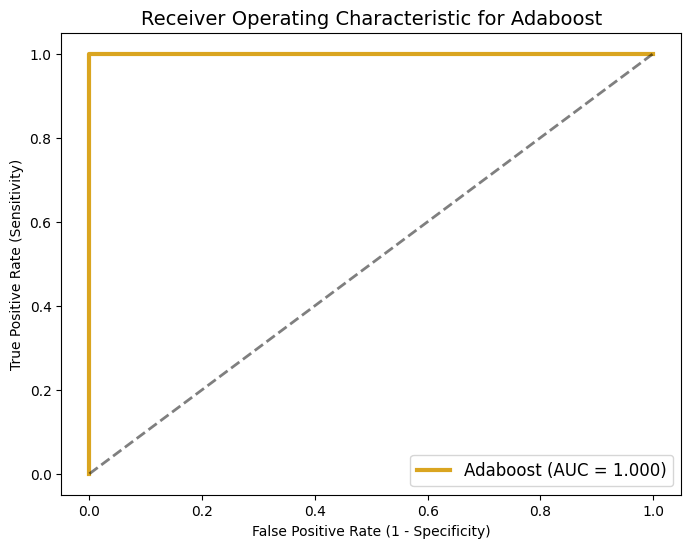

Confusion matrix of the model Catboost:
[[29  0]
 [ 1 50]]
True Negative of the model Catboost -> 29
False Positive of the model Catboost -> 0
False Negative of the model Catboost -> 1
True Positive of the model Catboost -> 50
Accuracy of the model Catboost -> 0.9875
Misclassification rate of the model Catboost -> 0.012499999999999956
Precision of the model Catboost -> 1.0
Recall of the model Catboost -> 0.9803921568627451
F1 Measure of the model Catboost -> 0.9900990099009901
Specificity of the model Catboost -> 1.0
MCC of the model Catboost -> 0.973505222533836
AUC of the model Catboost -> 1.0
Precision-Recall AUC of the model Catboost -> 1.0




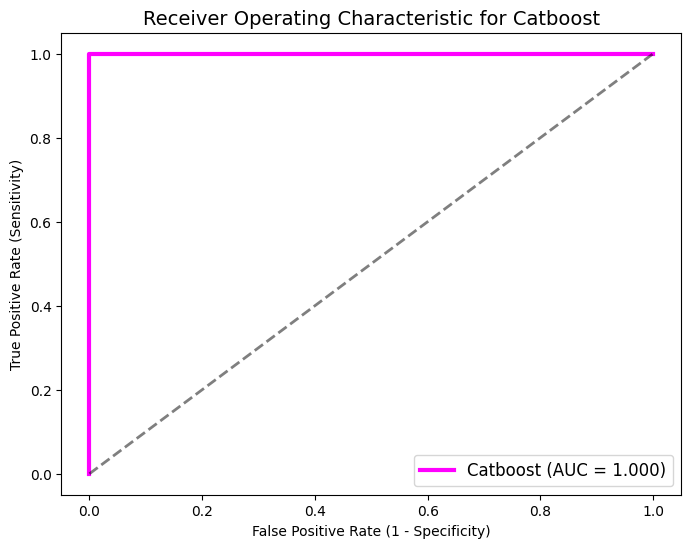

Confusion matrix of the model GradientBoost:
[[29  0]
 [ 1 50]]
True Negative of the model GradientBoost -> 29
False Positive of the model GradientBoost -> 0
False Negative of the model GradientBoost -> 1
True Positive of the model GradientBoost -> 50
Accuracy of the model GradientBoost -> 0.9875
Misclassification rate of the model GradientBoost -> 0.012499999999999956
Precision of the model GradientBoost -> 1.0
Recall of the model GradientBoost -> 0.9803921568627451
F1 Measure of the model GradientBoost -> 0.9900990099009901
Specificity of the model GradientBoost -> 1.0
MCC of the model GradientBoost -> 0.973505222533836
AUC of the model GradientBoost -> 1.0
Precision-Recall AUC of the model GradientBoost -> 1.0000000000000002




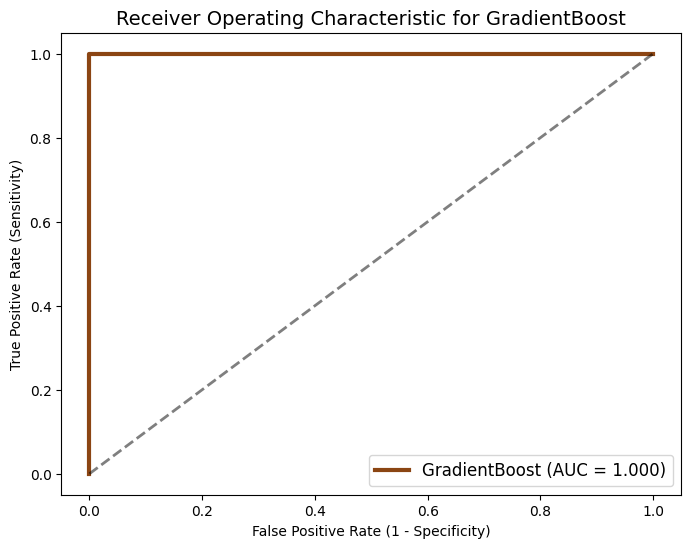

Confusion matrix of the model Stacking:
[[29  0]
 [ 0 51]]
True Negative of the model Stacking -> 29
False Positive of the model Stacking -> 0
False Negative of the model Stacking -> 0
True Positive of the model Stacking -> 51
Accuracy of the model Stacking -> 1.0
Misclassification rate of the model Stacking -> 0.0
Precision of the model Stacking -> 1.0
Recall of the model Stacking -> 1.0
F1 Measure of the model Stacking -> 1.0
Specificity of the model Stacking -> 1.0
MCC of the model Stacking -> 1.0
AUC of the model Stacking -> 1.0
Precision-Recall AUC of the model Stacking -> 1.0




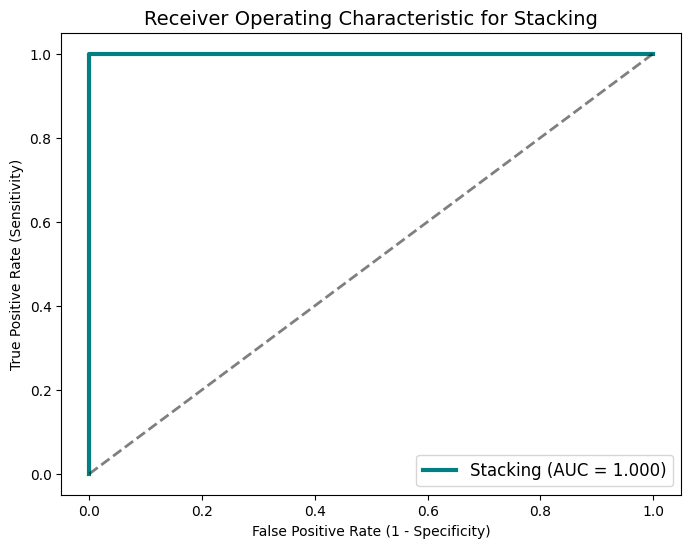

Confusion matrix of the model Voting Hard:
[[29  0]
 [ 1 50]]
True Negative of the model Voting Hard -> 29
False Positive of the model Voting Hard -> 0
False Negative of the model Voting Hard -> 1
True Positive of the model Voting Hard -> 50
Accuracy of the model Voting Hard -> 0.9875
Misclassification rate of the model Voting Hard -> 0.012499999999999956
Precision of the model Voting Hard -> 1.0
Recall of the model Voting Hard -> 0.9803921568627451
F1 Measure of the model Voting Hard -> 0.9900990099009901
Specificity of the model Voting Hard -> 1.0
MCC of the model Voting Hard -> 0.973505222533836
AUC of the model Voting Hard -> 0.9901960784313726
Precision-Recall AUC of the model Voting Hard -> 0.9928921568627451




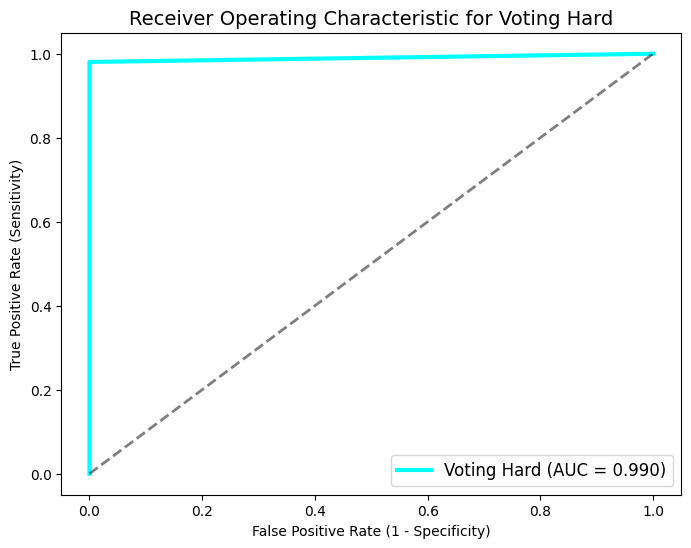

Confusion matrix of the model Voting Soft:
[[29  0]
 [ 1 50]]
True Negative of the model Voting Soft -> 29
False Positive of the model Voting Soft -> 0
False Negative of the model Voting Soft -> 1
True Positive of the model Voting Soft -> 50
Accuracy of the model Voting Soft -> 0.9875
Misclassification rate of the model Voting Soft -> 0.012499999999999956
Precision of the model Voting Soft -> 1.0
Recall of the model Voting Soft -> 0.9803921568627451
F1 Measure of the model Voting Soft -> 0.9900990099009901
Specificity of the model Voting Soft -> 1.0
MCC of the model Voting Soft -> 0.973505222533836
AUC of the model Voting Soft -> 1.0
Precision-Recall AUC of the model Voting Soft -> 1.0




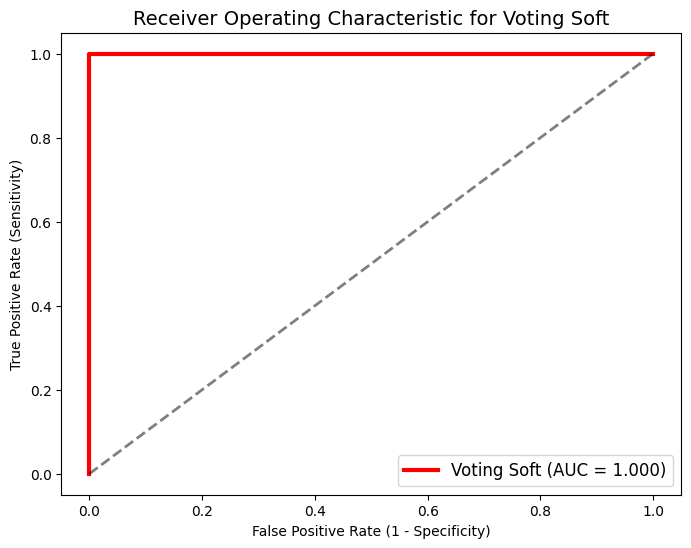

Confusion matrix of the model Blending:
[[29  0]
 [ 1 50]]
True Negative of the model Blending -> 29
False Positive of the model Blending -> 0
False Negative of the model Blending -> 1
True Positive of the model Blending -> 50
Accuracy of the model Blending -> 0.9875
Misclassification rate of the model Blending -> 0.012499999999999956
Precision of the model Blending -> 1.0
Recall of the model Blending -> 0.9803921568627451
F1 Measure of the model Blending -> 0.9900990099009901
Specificity of the model Blending -> 1.0
MCC of the model Blending -> 0.973505222533836
AUC of the model Blending -> 1.0
Precision-Recall AUC of the model Blending -> 1.0




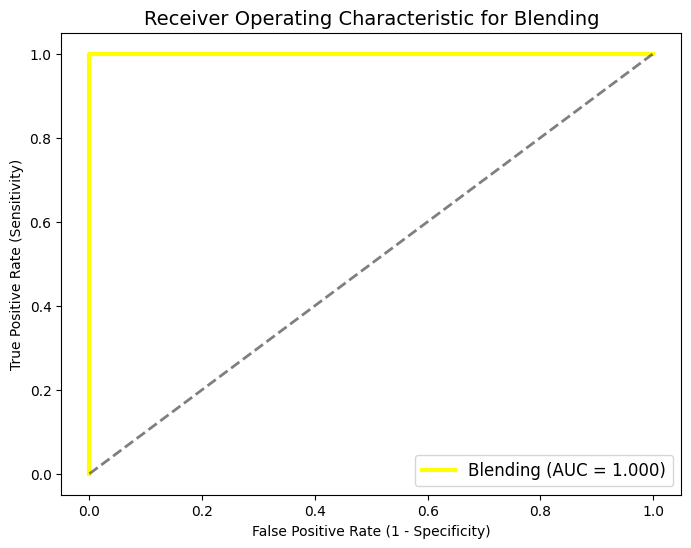

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
Confusion matrix of the model ANN:
[[29  0]
 [ 2 49]]
True Negative of the model ANN -> 29
False Positive of the model ANN -> 0
False Negative of the model ANN -> 2
True Positive of the model ANN -> 49
Accuracy of the model ANN -> 0.975
Misclassification rate of the model ANN -> 0.025000000000000022
Precision of the model ANN -> 1.0
Recall of the model ANN -> 0.9607843137254902
F1 Measure of the model ANN -> 0.98
Specificity of the model ANN -> 1.0
MCC of the model ANN -> 0.9480496975206558
AUC of the model ANN -> 0.9803921568627452
Precision-Recall AUC of the model ANN -> 0.9857843137254902




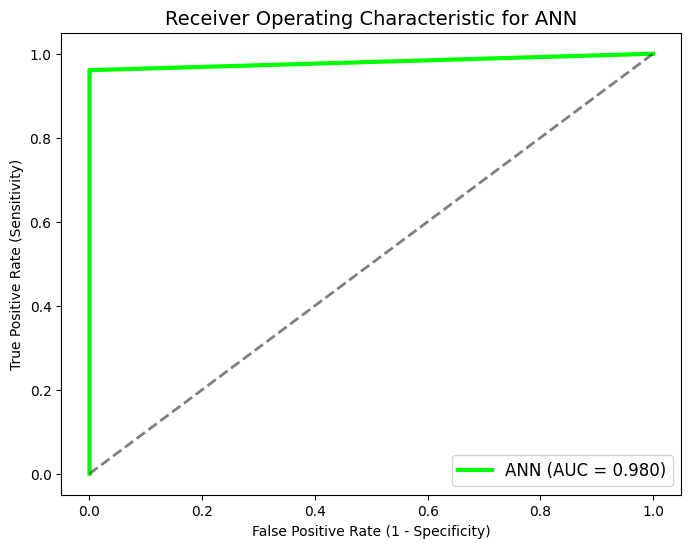

Confusion matrix of the model MLP:
[[29  0]
 [ 1 50]]
True Negative of the model MLP -> 29
False Positive of the model MLP -> 0
False Negative of the model MLP -> 1
True Positive of the model MLP -> 50
Accuracy of the model MLP -> 0.9875
Misclassification rate of the model MLP -> 0.012499999999999956
Precision of the model MLP -> 1.0
Recall of the model MLP -> 0.9803921568627451
F1 Measure of the model MLP -> 0.9900990099009901
Specificity of the model MLP -> 1.0
MCC of the model MLP -> 0.973505222533836
AUC of the model MLP -> 1.0
Precision-Recall AUC of the model MLP -> 1.0




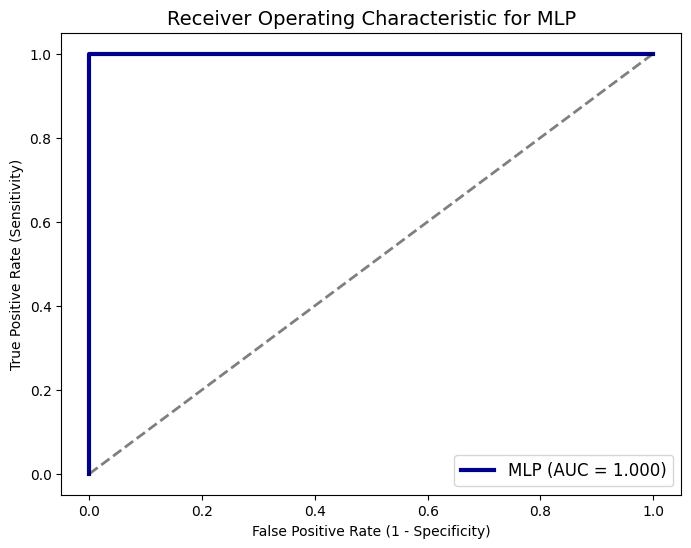

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Confusion matrix of the model SimpleRNN:
[[29  0]
 [ 1 50]]
True Negative of the model SimpleRNN -> 29
False Positive of the model SimpleRNN -> 0
False Negative of the model SimpleRNN -> 1
True Positive of the model SimpleRNN -> 50
Accuracy of the model SimpleRNN -> 0.9875
Misclassification rate of the model SimpleRNN -> 0.012499999999999956
Precision of the model SimpleRNN -> 1.0
Recall of the model SimpleRNN -> 0.9803921568627451
F1 Measure of the model SimpleRNN -> 0.9900990099009901
Specificity of the model SimpleRNN -> 1.0
MCC of the model SimpleRNN -> 0.973505222533836
AUC of the model SimpleRNN -> 0.9901960784313726
Precision-Recall AUC of the model SimpleRNN -> 0.9928921568627451




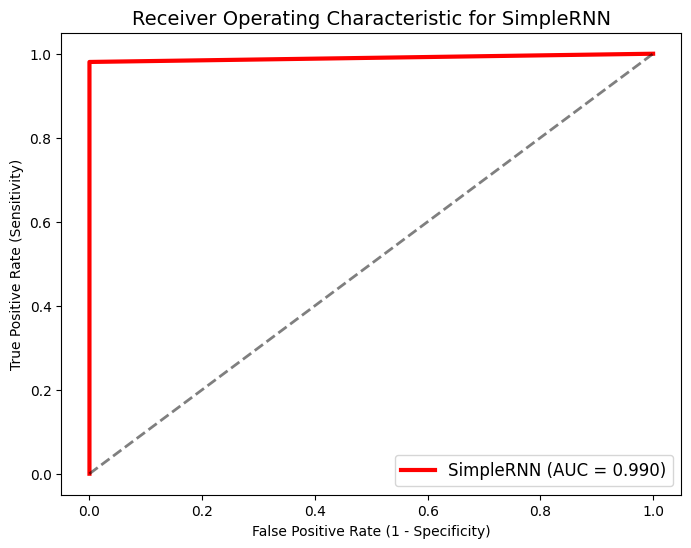

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step  
Confusion matrix of the model LSTM:
[[29  0]
 [ 1 50]]
True Negative of the model LSTM -> 29
False Positive of the model LSTM -> 0
False Negative of the model LSTM -> 1
True Positive of the model LSTM -> 50
Accuracy of the model LSTM -> 0.9875
Misclassification rate of the model LSTM -> 0.012499999999999956
Precision of the model LSTM -> 1.0
Recall of the model LSTM -> 0.9803921568627451
F1 Measure of the model LSTM -> 0.9900990099009901
Specificity of the model LSTM -> 1.0
MCC of the model LSTM -> 0.973505222533836
AUC of the model LSTM -> 0.9901960784313726
Precision-Recall AUC of the model LSTM -> 0.9928921568627451




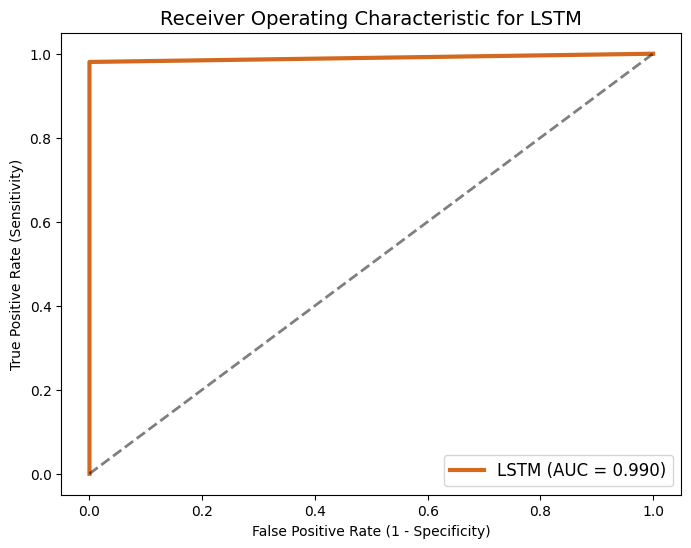

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
Confusion matrix of the model GRU:
[[29  0]
 [ 1 50]]
True Negative of the model GRU -> 29
False Positive of the model GRU -> 0
False Negative of the model GRU -> 1
True Positive of the model GRU -> 50
Accuracy of the model GRU -> 0.9875
Misclassification rate of the model GRU -> 0.012499999999999956
Precision of the model GRU -> 1.0
Recall of the model GRU -> 0.9803921568627451
F1 Measure of the model GRU -> 0.9900990099009901
Specificity of the model GRU -> 1.0
MCC of the model GRU -> 0.973505222533836
AUC of the model GRU -> 0.9901960784313726
Precision-Recall AUC of the model GRU -> 0.9928921568627451




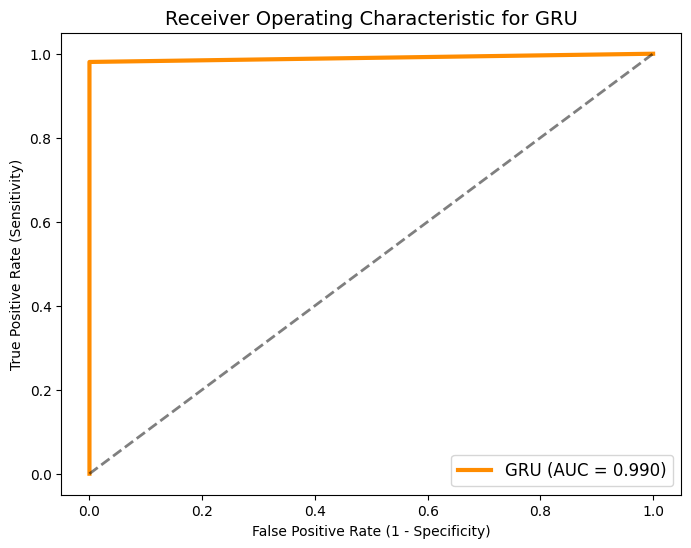

In [32]:
def eval_function_with_roc_plot():
    em_curves = []
    dl_curves = []

    for model in model_names:
        name = legend_names[model_names.index(model)]

        if name == "SVM":
            model_prediction = eval(f"model_{model}.predict(test_data[Features])")
            model_proba = eval(f"model_{model}.decision_function(test_data[Features])")
        elif name == "Bagging":
            model_proba = np.round(eval(f"model_{model}"))
            model_prediction = model_proba
        elif name == "Voting Hard":
            model_prediction = eval(f"model_{model}.predict(test_data[Features])")
            model_proba = model_prediction
        elif name == "Blending":
            model_predictions = eval(f"model_{model}.predict(meta_predictions)")
            model_proba = eval(f"model_{model}.predict_proba(meta_predictions)[:, 1]")
        elif name == "ANN":
            model_proba = eval(f"model_{model}.predict(test_features.reshape(test_features.shape[0], -1))")
            model_proba = np.where(model_proba > 0.5, 1, 0)
            model_prediction = model_proba
        elif name in ["SimpleRNN", "LSTM", "GRU"]:
            model_proba = eval(f"model_{model}.predict(test_features)")
            model_proba = np.where(model_proba > 0.5, 1, 0)
            model_prediction = model_proba
        else:
            model_prediction = eval(f"model_{model}.predict(test_data[Features])")
            model_proba = eval(f"model_{model}.predict_proba(test_data[Features])[:, 1]")

        model_cm = confusion_matrix(test_labels, model_prediction)
        tn, fp, fn, tp = model_cm.ravel()

        model_accuracy = accuracy_score(test_labels, model_prediction)
        model_misclassification = 1 - model_accuracy
        model_precision = precision_score(test_labels, model_prediction)
        model_recall = recall_score(test_labels, model_prediction)
        model_f1 = f1_score(test_labels, model_prediction)
        model_specificity = tn / (tn + fp) if (tn + fp) != 0 else 0.0
        model_mcc = matthews_corrcoef(test_labels, model_prediction)

        # ROC Curve and AUC
        model_fpr, model_tpr, _ = roc_curve(test_labels, model_proba)
        model_auc = auc(model_fpr, model_tpr)

        # Precision-Recall AUC
        precision, recall, _ = precision_recall_curve(test_labels, model_proba)
        model_pr_auc = average_precision_score(test_labels, model_proba)

        # Print metrics
        print(f"Confusion matrix of the model {name}:\n{model_cm}")
        print(f'True Negative of the model {name} -> {tn}')
        print(f'False Positive of the model {name} -> {fp}')
        print(f'False Negative of the model {name} -> {fn}')
        print(f'True Positive of the model {name} -> {tp}')
        print(f"Accuracy of the model {name} -> {model_accuracy}")
        print(f"Misclassification rate of the model {name} -> {model_misclassification}")
        print(f"Precision of the model {name} -> {model_precision}")
        print(f"Recall of the model {name} -> {model_recall}")
        print(f"F1 Measure of the model {name} -> {model_f1}")
        print(f"Specificity of the model {name} -> {model_specificity}")
        print(f"MCC of the model {name} -> {model_mcc}")
        print(f"AUC of the model {name} -> {model_auc}")
        print(f"Precision-Recall AUC of the model {name} -> {model_pr_auc}")
        print("\n")

        # Plot ROC Curve
        plt.figure(figsize=(8, 6))
        plt.plot(model_fpr, model_tpr, color=colors_names[model_names.index(model)], lw=3,
                 label=f'{name} (AUC = {model_auc:.3f})')
        plt.plot([0, 1], [0, 1], color='black', linestyle='--', lw=2, alpha=0.5)
        plt.legend(loc='lower right', fontsize=12)
        plt.xlabel('False Positive Rate (1 - Specificity)')
        plt.ylabel('True Positive Rate (Sensitivity)')
        plt.title(f'Receiver Operating Characteristic for {name}', fontsize=14)
        plt.show()

        # Save metrics to CSV
        csv_filename = f"models/{name}_metrics.csv"
        with open(csv_filename, 'w', newline='') as csvfile:
            csv_writer = csv.writer(csvfile)
            csv_writer.writerow(['Metric', 'Value'])
            csv_writer.writerow(['True Negative', tn])
            csv_writer.writerow(['False Positive', fp])
            csv_writer.writerow(['False Negative', fn])
            csv_writer.writerow(['True Positive', tp])
            csv_writer.writerow(['Accuracy', model_accuracy])
            csv_writer.writerow(['Misclassification rate', model_misclassification])
            csv_writer.writerow(['Precision', model_precision])
            csv_writer.writerow(['Recall', model_recall])
            csv_writer.writerow(['F1 Measure', model_f1])
            csv_writer.writerow(['Specificity', model_specificity])
            csv_writer.writerow(['MCC', model_mcc])
            csv_writer.writerow(['AUC', model_auc])
            csv_writer.writerow(['Precision-Recall AUC', model_pr_auc])

        # Append to respective lists
        if name in lem_names:
            em_curves.append([model_fpr, model_tpr, colors_names[model_names.index(model)], name, model_auc])
        elif name in ldl_names:
            dl_curves.append([model_fpr, model_tpr, colors_names[model_names.index(model)], name, model_auc])

    return em_curves, dl_curves

em_c, dl_c = eval_function_with_roc_plot()

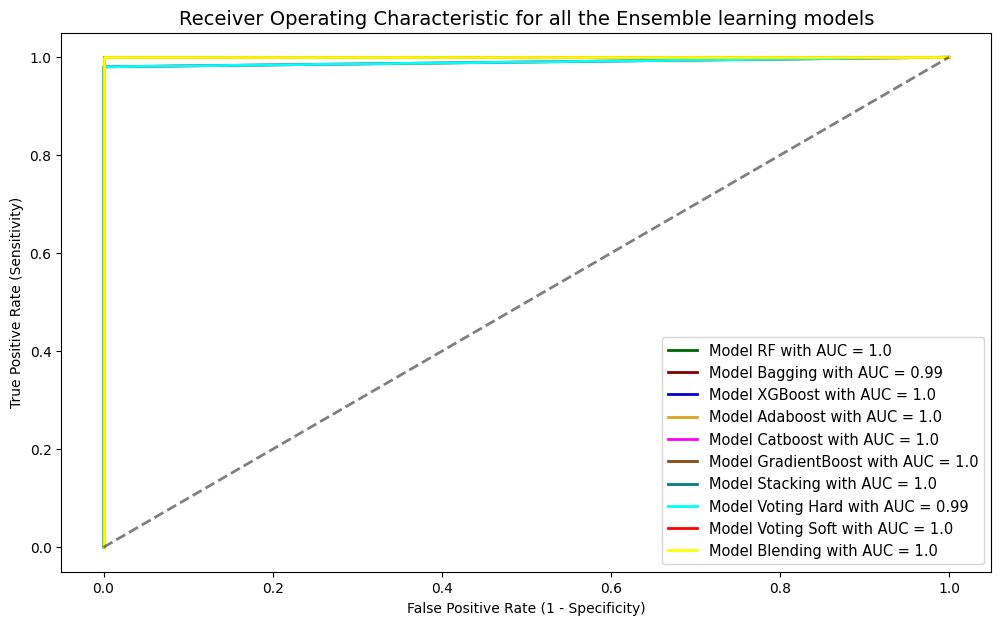

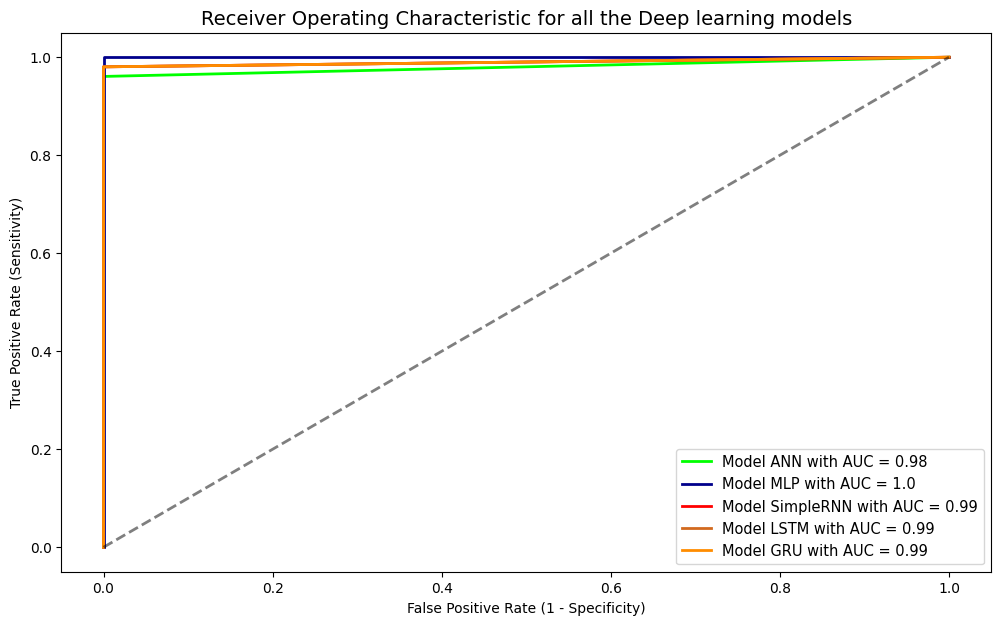

In [33]:
roc_curves = [em_c, dl_c]
names = ["Ensemble", "Deep"]

for i in range(len(roc_curves)):
    plt.figure(figsize=(12, 7))
    for j in range(len(roc_curves[i])):
        plt.plot(roc_curves[i][j][0], roc_curves[i][j][1], color=roc_curves[i][j][2], lw=2, label=f'Model {roc_curves[i][j][3]} with AUC = {round(roc_curves[i][j][4], 2)}')

    plt.plot([0, 1], [0, 1], color='black', linestyle='--', lw=2, alpha=0.5)

    # Customize legend position
    plt.legend(loc = 'lower right', fontsize=10.5)

    # Add labels and title
    plt.xlabel('False Positive Rate (1 - Specificity)')
    plt.ylabel('True Positive Rate (Sensitivity)')
    plt.title(f'Receiver Operating Characteristic for all the {names[i]} learning models', fontsize=14)

    # Show the plot
    plt.show()